In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load dataset
file_path = "BT_2.xlsx"
df = pd.read_excel(file_path)

print("Initial dataset shape:", df.shape)

Initial dataset shape: (40, 7130)


In [3]:
# Step 2: Separate features and target (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Step 3: Optimized mRMR (using all features)

feature = 19
def optimized_mrmr(X, y, n_features=feature):
    # Calculate mutual information for all features
    relevance = mutual_info_classif(X, y, discrete_features='auto')
    relevance_dict = dict(zip(X.columns, relevance))

    # Compute full correlation matrix once (saves time)
    corr_matrix = X.corr().abs()

    selected_features = []
    remaining_features = list(X.columns)

    # Select first feature (highest relevance)
    first_feature = max(relevance_dict, key=relevance_dict.get)
    selected_features.append(first_feature)
    remaining_features.remove(first_feature)

    print(f"Feature 1 selected: {first_feature}")

    # Iteratively select remaining features
    while len(selected_features) < n_features:
        best_score = -np.inf
        best_feature = None

        for feature in remaining_features:
            rel = relevance_dict[feature]
            # Redundancy: average correlation with selected features (fast lookup)
            redundancy = corr_matrix.loc[feature, selected_features].mean()
            score = rel - redundancy

            if score > best_score:
                best_score = score
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Feature {len(selected_features)} selected: {best_feature}")

    return selected_features

selected_features = optimized_mrmr(X, y, n_features=feature)
print("\nTop 20 Selected Features (mRMR):")
print(selected_features)

Feature 1 selected: S45630_at
Feature 2 selected: D76435_at
Feature 3 selected: M14648_at
Feature 4 selected: X13916_at
Feature 5 selected: L07765_at
Feature 6 selected: U47621_at
Feature 7 selected: M64497_at
Feature 8 selected: X04828_at
Feature 9 selected: M31651_at
Feature 10 selected: M74542_at
Feature 11 selected: J04173_at
Feature 12 selected: U52828_s_at
Feature 13 selected: M93119_at
Feature 14 selected: U85707_at
Feature 15 selected: U91930_at
Feature 16 selected: X04445_rna1_s_at
Feature 17 selected: U12465_at
Feature 18 selected: L10373_at
Feature 19 selected: M96740_at

Top 20 Selected Features (mRMR):
['S45630_at', 'D76435_at', 'M14648_at', 'X13916_at', 'L07765_at', 'U47621_at', 'M64497_at', 'X04828_at', 'M31651_at', 'M74542_at', 'J04173_at', 'U52828_s_at', 'M93119_at', 'U85707_at', 'U91930_at', 'X04445_rna1_s_at', 'U12465_at', 'L10373_at', 'M96740_at']


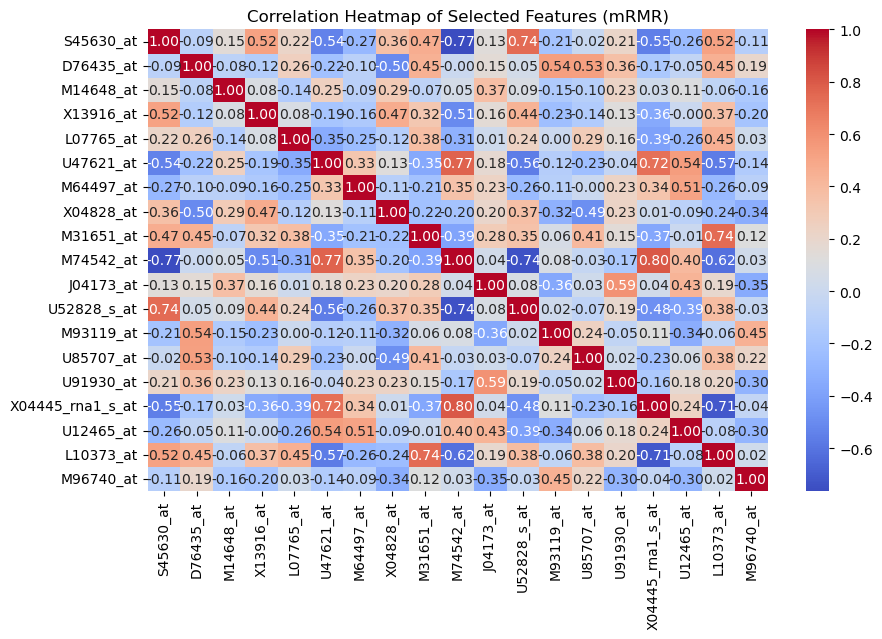

In [5]:
# Visualization 1: Correlation heatmap of selected features
plt.figure(figsize=(10, 6))
sns.heatmap(X[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Features (mRMR)")
plt.show()

In [6]:
# Step 4: Scaling (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X[selected_features]), columns=selected_features)

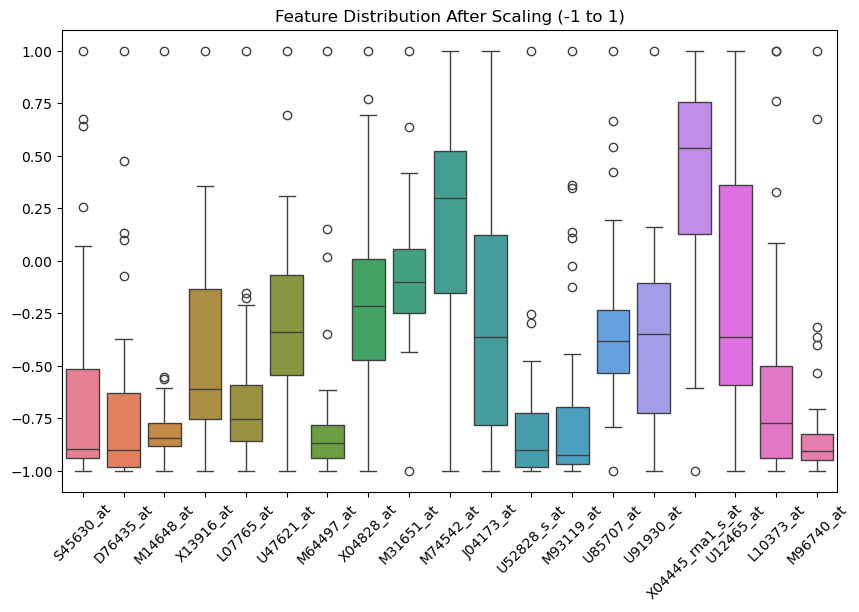

In [7]:
# Visualization 2: Distribution after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_scaled)
plt.title("Feature Distribution After Scaling (-1 to 1)")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Step 5: Randomize
np.random.seed(42)
shuffled_indices = np.random.permutation(len(X_scaled))
X_randomized = X_scaled.iloc[shuffled_indices].reset_index(drop=True)
y_randomized = y.iloc[shuffled_indices].reset_index(drop=True)

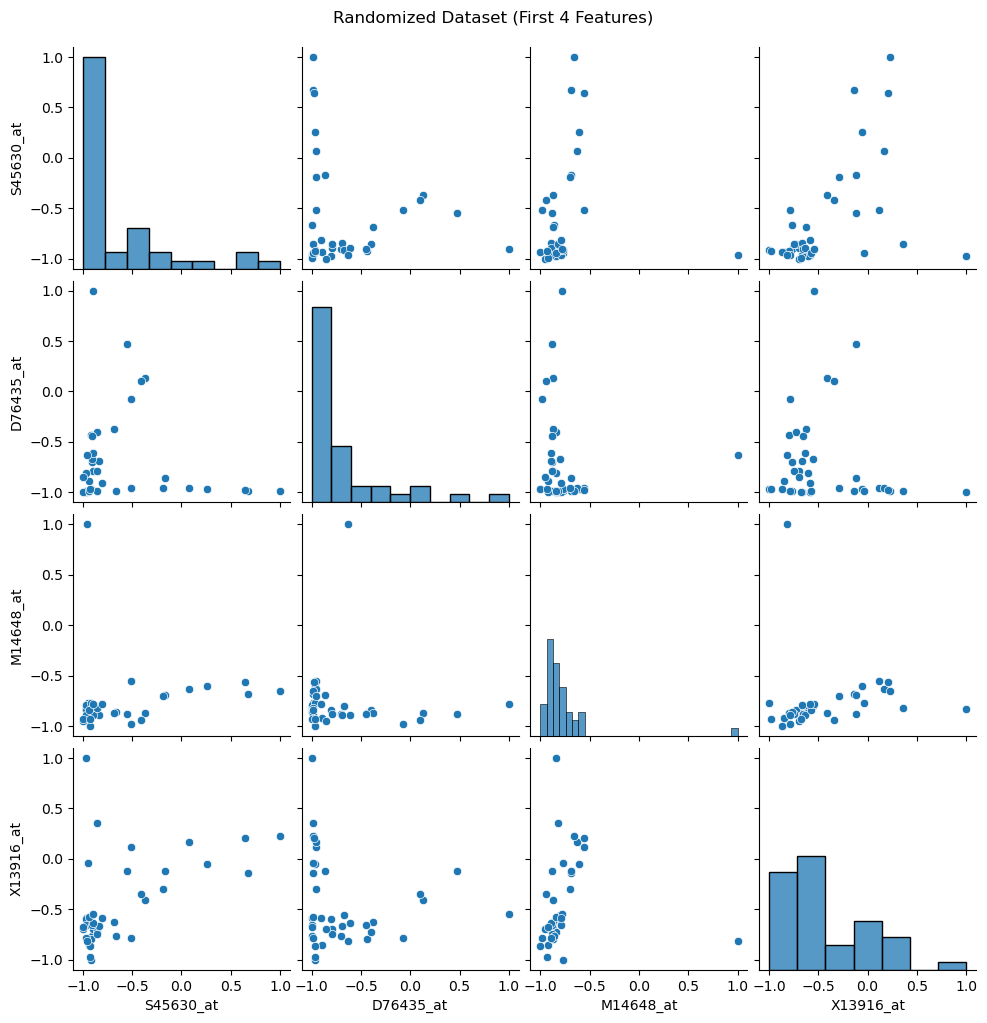

In [9]:
# Visualization 3: Pairplot (first 4 features)
sns.pairplot(X_randomized.iloc[:, :4])
plt.suptitle("Randomized Dataset (First 4 Features)", y=1.02)
plt.show()

In [10]:
print("\nFinal dataset shape after mRMR, scaling, and randomization:", X_randomized.shape)


Final dataset shape after mRMR, scaling, and randomization: (40, 19)


In [11]:
# Combine the processed (randomized) features and target back together
final_dataset = pd.concat([X_randomized, y_randomized.rename("Target")], axis=1)

# Display the final dataset
print("\n✅ Final Processed Dataset (After mRMR, Scaling, and Randomization):")
display(final_dataset.head(20))  # show first 20 rows

print("\nFinal dataset shape:", final_dataset.shape)


✅ Final Processed Dataset (After mRMR, Scaling, and Randomization):


,S45630_at,D76435_at,M14648_at,X13916_at,L07765_at,U47621_at,M64497_at,X04828_at,M31651_at,M74542_at,J04173_at,U52828_s_at,M93119_at,U85707_at,U91930_at,X04445_rna1_s_at,U12465_at,L10373_at,M96740_at,Target
0,0.674115,-0.988236,-0.686681,-0.138010,-0.764706,-0.786727,-0.954339,-0.249281,0.356105,-0.443705,-0.313035,-0.715164,-0.967027,-0.662516,-0.157326,0.288616,-0.209128,-0.350074,-0.887695,1
1,0.256859,-0.966885,-0.606128,-0.055661,-0.674060,-0.273419,-0.899387,0.452912,-0.222384,-0.064165,-0.524670,-0.791427,-0.944287,0.155666,-0.029735,0.124945,-0.407221,-0.597512,-0.967565,1
2,-0.516931,-0.952373,-0.553744,0.113229,-0.738991,-0.357414,-0.952560,0.692847,-0.369186,-0.127724,-0.496126,-0.478249,-0.932348,-0.683686,-0.159488,0.539091,-0.909537,-0.582649,-0.933914,1
3,-0.965181,-0.997567,-0.816654,-0.589401,-0.780135,0.168337,0.019964,0.007369,-0.143895,0.617433,-0.179013,-0.989964,-0.964042,-0.110834,-0.279149,0.802134,0.362262,-0.937886,-0.933104,2
4,-0.906715,-0.700474,-0.879417,-0.767823,-0.625844,-0.333218,-0.892074,-0.433861,-0.279070,0.522397,-0.899959,-0.901403,-0.442297,-1.000000,-1.000000,0.537337,-1.000000,-0.834859,-0.849584,0
5,0.071781,-0.959815,-0.629355,0.163172,-0.364192,-0.810577,-0.962641,0.309490,0.145349,-0.483051,-0.010330,-0.296321,-0.960063,-0.457036,-0.316994,-0.605144,-0.564441,-0.189627,-0.938374,1
6,-0.897991,-0.790518,-0.868050,-0.695768,-0.688203,-0.538887,-0.910259,-0.410316,-0.257267,0.419492,-0.431290,-0.950454,-0.964468,-0.510585,-0.411786,0.306445,-0.966485,-0.603692,-0.362660,4
7,-0.973139,-0.808263,-0.841364,-0.601601,-0.882996,-0.156931,-0.839889,-0.159058,-0.165698,0.516949,-0.085633,-0.942609,-0.916998,-0.422167,-0.221121,0.770568,0.159809,-0.947117,-0.939996,2
8,-0.936178,-0.890236,-0.919447,-0.852078,-0.486339,-0.519876,-0.887725,-0.489756,-0.140988,0.077482,-0.759413,-0.602219,0.345225,-0.270237,-0.651108,0.474207,-0.537330,-0.868888,-0.316035,4
9,-0.922479,-0.434349,-0.872992,-0.795273,-0.702347,-0.336675,-0.906108,-0.480230,-0.029070,0.123487,-0.914775,-0.904513,-0.603042,-0.354919,-0.767526,0.695747,-0.393460,-0.911288,-0.398743,0



Final dataset shape: (40, 20)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [13]:
# 1) Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_randomized,
    y_randomized,
    test_size=0.3,      # 20% for testing
    random_state=42,    # for reproducibility
    stratify=y_randomized  # optional, good for classification
)

# 2) Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# 3) Predict and get accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Total samples: 40
Training samples: 28 (70.00%)
Testing samples: 12 (30.00%)
Random Forest Accuracy: 75.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.75        12
   macro avg       0.70      0.73      0.70        12
weighted avg       0.71      0.75      0.71        12

